# Dataprep
- Mik a lépések

## 1. Import packeges

In [1]:
#pip install h5py

In [2]:
import h5py
import os
import pandas as pd
import numpy as np
import datetime
import scipy 

In [3]:
adapt_path = '/Users/szejozsef00/Desktop/MSC/MSC 2. félév/DS Lab I/project/data/adapt/'
train_path = '/Users/szejozsef00/Desktop/MSC/MSC 2. félév/DS Lab I/project/data/train/'

output_path = '/Users/szejozsef00/Desktop/MSC/MSC 2. félév/DS Lab I/project/data/processed/'

## 2. Load the data
- Explore the input file structure
- Load the adapt data to dataframe
- Load the train data to dataframe
- Concatenate together and sort by Datetime

In [4]:
# Check one .h5 file structure
def print_it(name):
    dset = f[name]
    print(dset)
    print(type(dset))

with h5py.File(train_path + 'X1.h5', 'r') as f:
    f.visit(print_it)

<HDF5 group "/X" (2 members)>
<class 'h5py._hl.group.Group'>
<HDF5 dataset "type": shape (), type "|S14">
<class 'h5py._hl.dataset.Dataset'>
<HDF5 group "/X/value" (5 members)>
<class 'h5py._hl.group.Group'>
<HDF5 group "/X/value/X" (2 members)>
<class 'h5py._hl.group.Group'>
<HDF5 dataset "type": shape (), type "|S13">
<class 'h5py._hl.dataset.Dataset'>
<HDF5 dataset "value": shape (231, 1916, 1), type "<f4">
<class 'h5py._hl.dataset.Dataset'>
<HDF5 group "/X/value/aux" (2 members)>
<class 'h5py._hl.group.Group'>
<HDF5 dataset "type": shape (), type "|S7">
<class 'h5py._hl.dataset.Dataset'>
<HDF5 dataset "value": shape (2,), type "<i4">
<class 'h5py._hl.dataset.Dataset'>
<HDF5 group "/X/value/hat" (2 members)>
<class 'h5py._hl.group.Group'>
<HDF5 dataset "type": shape (), type "|S14">
<class 'h5py._hl.dataset.Dataset'>
<HDF5 group "/X/value/hat/value" (2 members)>
<class 'h5py._hl.group.Group'>
<HDF5 group "/X/value/hat/value/X" (2 members)>
<class 'h5py._hl.group.Group'>
<HDF5 datase

In [5]:
#get the input files list
adapt_input_files = os.listdir(adapt_path)
train_input_files = os.listdir(train_path)

### Load the data from the adapt folder

In [6]:

adapt_result_df = pd.DataFrame()

#iterate through the input files
for h_file in adapt_input_files:
    print("Actual:", h_file)
    curr_result_df = pd.DataFrame()
    with h5py.File(adapt_path + h_file, 'r') as f:
        #get the values from the h5 file
        val_data = f.get('X/value/X/value')
        val_dataset = np.array(val_data)
        reshaped_val_dataset = val_dataset.reshape(val_dataset.shape[0], val_dataset.shape[1])
        # print("VAL_SHAPE:", reshaped_val_dataset.shape)
        curr_value_df = pd.DataFrame(reshaped_val_dataset)
        
        #get the timestamps from the h5 file
        time_data = f.get('X/value/t/value')
        time_dataset = np.array(time_data)
        # print("TIME SHAPE:", time_dataset.shape)
        curr_time_df = pd.DataFrame(time_dataset, columns=['DATETIME'])

    #concatenate together
    curr_result_df = pd.concat([curr_time_df,curr_value_df],axis=1)
    adapt_result_df = pd.concat([adapt_result_df,curr_result_df],axis=0)
    print("Shape final:", adapt_result_df.shape)

Actual: X33.h5
Shape final: (12, 1917)
Actual: X62.h5
Shape final: (884, 1917)
Actual: X56.h5
Shape final: (1855, 1917)
Actual: X2.h5
Shape final: (3172, 1917)
Actual: X17.h5
Shape final: (4292, 1917)
Actual: X46.h5
Shape final: (4304, 1917)
Actual: X23.h5
Shape final: (5784, 1917)
Actual: X6.h5
Shape final: (5796, 1917)
Actual: X52.h5
Shape final: (5808, 1917)
Actual: X66.h5
Shape final: (5820, 1917)
Actual: X37.h5
Shape final: (5832, 1917)
Actual: X27.h5
Shape final: (5844, 1917)
Actual: X42.h5
Shape final: (5856, 1917)
Actual: X13.h5
Shape final: (5868, 1917)
Actual: X7.h5
Shape final: (5880, 1917)
Actual: X53.h5
Shape final: (6079, 1917)
Actual: X67.h5
Shape final: (6091, 1917)
Actual: X36.h5
Shape final: (6103, 1917)
Actual: X26.h5
Shape final: (6243, 1917)
Actual: X43.h5
Shape final: (6255, 1917)
Actual: X12.h5
Shape final: (6267, 1917)
Actual: X32.h5
Shape final: (9290, 1917)
Actual: X63.h5
Shape final: (9302, 1917)
Actual: X57.h5
Shape final: (9314, 1917)
Actual: X3.h5
Shape fi

In [7]:
#format the date and sort the data
adapt_result_df['DATETIME'] = pd.to_datetime(adapt_result_df['DATETIME'], unit='s')
adapt_result_df = adapt_result_df.sort_values(['DATETIME'])
adapt_result_df.reset_index(drop=True,inplace=True)

In [8]:
#Check the result
adapt_result_df.head(5)

,DATETIME,0,1,2,3,4,5,6,7,8,...,1906,1907,1908,1909,1910,1911,1912,1913,1914,1915
0,2010-07-01 18:05:00,342.600006,-72.300003,0.0,504.899994,245.410004,762.429993,925.150024,0.0,618.489990,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2010-07-01 18:10:00,340.519989,-77.459999,0.0,465.290009,244.770004,743.580017,911.150024,0.0,619.239990,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2010-07-01 18:15:00,332.220001,-84.269997,0.0,481.130005,240.809998,752.510010,923.549988,0.0,622.340027,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2010-07-01 18:20:00,323.000000,-74.360001,0.0,490.679993,236.600006,769.719971,937.260010,0.0,577.380005,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2010-07-01 18:25:00,302.429993,-88.839996,0.0,487.970001,212.750000,773.739990,933.130005,0.0,577.349976,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Load the data from the train folder

In [9]:
train_result_df = pd.DataFrame()

#iterate through the input files
for h_file in train_input_files:
    print("Actual:", h_file)
    curr_result_df = pd.DataFrame()
    with h5py.File(train_path + h_file, 'r') as f:
        #get the values from the h5 file
        val_data = f.get('X/value/X/value')
        val_dataset = np.array(val_data)
        reshaped_val_dataset = val_dataset.reshape(val_dataset.shape[0], val_dataset.shape[1])
        # print("VAL_SHAPE:", reshaped_val_dataset.shape)
        curr_value_df = pd.DataFrame(reshaped_val_dataset)
        
        #get the timestamps from the h5 file
        time_data = f.get('X/value/t/value')
        time_dataset = np.array(time_data)
        # print("TIME SHAPE:", time_dataset.shape)
        curr_time_df = pd.DataFrame(time_dataset, columns=['DATETIME'])

    #concatenate together
    curr_result_df = pd.concat([curr_time_df,curr_value_df],axis=1)
    train_result_df = pd.concat([train_result_df,curr_result_df],axis=0)
    print("Shape final:", train_result_df.shape)

Actual: X135.h5
Shape final: (12, 1917)
Actual: X33.h5
Shape final: (24, 1917)
Actual: X62.h5
Shape final: (36, 1917)
Actual: X164.h5
Shape final: (48, 1917)
Actual: X206.h5
Shape final: (60, 1917)
Actual: X197.h5
Shape final: (72, 1917)
Actual: X91.h5
Shape final: (1440, 1917)
Actual: X257.h5
Shape final: (1452, 1917)
Actual: X150.h5
Shape final: (1464, 1917)
Actual: X56.h5
Shape final: (1476, 1917)
Actual: X2.h5
Shape final: (1488, 1917)
Actual: X101.h5
Shape final: (1500, 1917)
Actual: X263.h5
Shape final: (1512, 1917)
Actual: X232.h5
Shape final: (2655, 1917)
Actual: X222.h5
Shape final: (2667, 1917)
Actual: X273.h5
Shape final: (2679, 1917)
Actual: X111.h5
Shape final: (2691, 1917)
Actual: X280.h5
Shape final: (4813, 1917)
Actual: X17.h5
Shape final: (4825, 1917)
Actual: X46.h5
Shape final: (5132, 1917)
Actual: X140.h5
Shape final: (5144, 1917)
Actual: X247.h5
Shape final: (5172, 1917)
Actual: X81.h5
Shape final: (5184, 1917)
Actual: X187.h5
Shape final: (5342, 1917)
Actual: X216.

In [10]:
#format the date and sort the data
train_result_df['DATETIME'] = pd.to_datetime(train_result_df['DATETIME'], unit='s')
train_result_df = train_result_df.sort_values(['DATETIME'])
train_result_df.reset_index(drop=True,inplace=True)

In [11]:
#Check the result
train_result_df.tail(5)

,DATETIME,0,1,2,3,4,5,6,7,8,...,1906,1907,1908,1909,1910,1911,1912,1913,1914,1915
105044,2010-07-01 17:40:00,318.059998,-82.980003,0.0,466.170013,229.940002,753.830017,897.330017,0.0,591.799988,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
105045,2010-07-01 17:45:00,312.109985,-91.480003,0.0,453.519989,228.130005,783.429993,897.640015,0.0,591.640015,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
105046,2010-07-01 17:50:00,299.309998,-102.099998,0.0,443.500000,213.039993,746.409973,872.859985,0.0,599.530029,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
105047,2010-07-01 17:55:00,295.839996,-100.650002,0.0,441.010010,210.429993,739.979980,876.309998,0.0,599.880005,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
105048,2010-07-01 18:00:00,298.510010,-101.330002,0.0,436.200012,215.279999,728.739990,861.719971,0.0,606.099976,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Concat the date from the 2 different source together

In [12]:
result_df = pd.concat([train_result_df,adapt_result_df])
result_df = result_df.sort_values(['DATETIME'])
result_df.reset_index(drop=True,inplace=True)

In [13]:
result_df.head(5)

,DATETIME,0,1,2,3,4,5,6,7,8,...,1906,1907,1908,1909,1910,1911,1912,1913,1914,1915
0,2009-07-02 00:00:00,-79.500000,-397.619995,238.770004,-381.690002,-32.470001,-850.789978,-449.950012,872.809998,879.260010,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2009-07-02 00:05:00,-22.809999,-333.730011,239.580002,-243.929993,5.070000,-694.869995,-285.089996,835.020020,841.179993,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2009-07-02 00:10:00,23.020000,-301.720001,244.039993,-165.259995,39.049999,-591.559998,-178.179993,809.369995,815.349976,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2009-07-02 00:15:00,21.360001,-302.480011,242.220001,-159.979996,38.070000,-556.270020,-144.250000,805.049988,810.989990,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2009-07-02 00:20:00,25.180000,-299.279999,233.919998,-142.809998,42.450001,-494.029999,-84.699997,757.760010,763.349976,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
# #save the concatenated data
# result_df.to_csv(output_path + 'concatenated_raw_data.csv',index=False,sep=';',decimal=',')

## 3. EDA
- Check missing values
- Check missing datetimes
- Check locations with only 0 value

### Check missing values

In [15]:
#Check missing values
print('Number of missing values:', result_df.isna().sum().sum())

Number of missing values: 0


### Check missing datetimes

In [16]:
#Check min and max datetime
print('MIN DATETIME:', result_df['DATETIME'].min())
print('MAX DATETIME:', result_df['DATETIME'].max())

MIN DATETIME: 2009-07-02 00:00:00
MAX DATETIME: 2010-09-25 22:15:00


NOTE: For the task, we only want to keep full days

In [17]:
#Drop the last not full day's data
result_df = result_df[result_df['DATETIME'] < datetime.datetime(2010,9,25,0,0,0)]
print('MIN DATE:', result_df['DATETIME'].min())
print('MAX DATE:', result_df['DATETIME'].max())

MIN DATE: 2009-07-02 00:00:00
MAX DATE: 2010-09-24 23:55:00


In [18]:
#Generate a datetimerange to find missing dates
control_datetimes = pd.date_range(
    start = result_df['DATETIME'].min(),
    end = result_df['DATETIME'].max(),
    freq = "5T"
)
control_datetimes_df = pd.DataFrame(control_datetimes,columns=['DATETIME'])
control_datetimes_df['CONTROL'] = 1
control_datetimes_df.head(5)

,DATETIME,CONTROL
0,2009-07-02 00:00:00,1
1,2009-07-02 00:05:00,1
2,2009-07-02 00:10:00,1
3,2009-07-02 00:15:00,1
4,2009-07-02 00:20:00,1


In [19]:
# merge the control datetimerange to the original and count the missing datetimes
check_datetime_df = control_datetimes_df.merge(
    result_df[['DATETIME']],
    on=['DATETIME'],
    how='left'
)
missing_datetimes = check_datetime_df.isna().sum().sum()
print(f"Missing datetime(s): {missing_datetimes}")

Missing datetime(s): 0


### Check locations with only 0 value

In [20]:
# print("Number of rows:",len(result_df))

# # specifiy a threshold for filtering
# # ez nem a legjobb megoldás, nem jó hozzáállás, meg lehetne hagyni
# zero_drop_threshold = round(len(result_df) * 0.8, 0)
# print("Threshold:",int(zero_drop_threshold))

# # count the zero values and keep only those locations where the number of zeros is less than the threshold
# zero_locations_df = result_df[result_df == 0].count().to_frame()
# zero_locations_df.rename(columns={0 : 'ZEROS'},inplace=True)
# filled_locations_df = zero_locations_df[zero_locations_df['ZEROS'] <= zero_drop_threshold]
# filled_locations = filled_locations_df.index.tolist()
# print(f"{len(zero_locations_df) - len(filled_locations)} location(s) are dropped")

In [21]:
# keep only the locations with valid data
# result_df = result_df[filled_locations]
result_df.shape

(129600, 1917)

In [22]:
# #save the processed data
# result_df.to_csv(output_path + 'processed_data.csv',index=False,sep=';',decimal=',')

## 4. Standardize the data
- Standardize the data by locations for modelling

In [23]:
# copy the whole dataset
stand_result_df = result_df.copy(deep=True)

#standardize the data by locations (columns) with scipy
for col in stand_result_df.columns[1:]:
    stand_result_df[col] = scipy.stats.zscore(stand_result_df[col])

stand_result_df[stand_result_df.columns[1:4]].describe()

,0,1,2
count,1.296000e+05,1.296000e+05,1.296000e+05
mean,-9.419006e-09,-7.158445e-08,1.130281e-07
std,1.000004e+00,1.000004e+00,1.000004e+00
min,-4.661140e+00,-5.923776e+00,-2.687912e+00
25%,-7.302927e-01,-6.783797e-01,-6.895432e-01
50%,7.566768e-02,5.038295e-02,7.118306e-02
75%,7.236614e-01,7.037089e-01,7.377802e-01
max,3.054663e+00,3.648373e+00,4.298556e+00


In [54]:
# #save the processed data
stand_result_df.to_csv(output_path + 'standardized_data.csv',index=False,sep=';',decimal=',')

## 5. Transform the data
- TODO

In [25]:
# Add Date column
stand_result_df['DATE'] = pd.to_datetime(stand_result_df['DATETIME']).dt.date

In [26]:
# Melt the dataframe to DATE-DATETIME-LOCATION-VALUE format
melted_fact_df = pd.melt(stand_result_df, id_vars=['DATE','DATETIME'],var_name='LOCATION', value_name='VALUE')
melted_fact_df.head(5)


,DATE,DATETIME,LOCATION,VALUE
0,2009-07-02,2009-07-02 00:00:00,0,-79.500000
1,2009-07-02,2009-07-02 00:05:00,0,-22.809999
2,2009-07-02,2009-07-02 00:10:00,0,23.020000
3,2009-07-02,2009-07-02 00:15:00,0,21.360001
4,2009-07-02,2009-07-02 00:20:00,0,25.180000


In [27]:
# Melt the dataframe to DATE-LOCATION-VALUE_LIST format
daily_fact_df = melted_fact_df.groupby(['DATE','LOCATION'])['VALUE'].apply(np.array).reset_index(name='VALUE_LIST')
daily_fact_df.head(5)

,DATE,LOCATION,VALUE_LIST
0,2009-07-02,0,"[-79.5, -22.81, 23.02, 21.36, 25.18, 11.0, 13...."
1,2009-07-02,1,"[-397.62, -333.73, -301.72, -302.48, -299.28, ..."
2,2009-07-02,2,"[238.77, 239.58, 244.04, 242.22, 233.92, 235.6..."
3,2009-07-02,3,"[-381.69, -243.93, -165.26, -159.98, -142.81, ..."
4,2009-07-02,4,"[-32.47, 5.07, 39.05, 38.07, 42.45, 32.58, 33...."


In [28]:
# Melt the dataframe to LOCATION-VALUE_LIST format
location_fact_df = daily_fact_df.groupby(['LOCATION'])['VALUE_LIST'].apply(np.array).reset_index(name='VALUE_LIST')
# stack the data to (450,288) shape
location_fact_df['VALUE_LIST'] = location_fact_df['VALUE_LIST'].apply(lambda x : np.stack(x,axis = 0))
# reshape the data to (450,288,1) shape
location_fact_df['VALUE_LIST'] = location_fact_df['VALUE_LIST'].apply(lambda x : x.reshape(450,288,1))
location_fact_df.head(5)

,LOCATION,VALUE_LIST
0,0,"[[[-79.5], [-22.81], [23.02], [21.36], [25.18]..."
1,1,"[[[-397.62], [-333.73], [-301.72], [-302.48], ..."
2,2,"[[[238.77], [239.58], [244.04], [242.22], [233..."
3,3,"[[[-381.69], [-243.93], [-165.26], [-159.98], ..."
4,4,"[[[-32.47], [5.07], [39.05], [38.07], [42.45],..."


In [30]:
# save the model ready data to csv
location_fact_df.to_csv(output_path + 'location_data.csv',index=False,sep=';',decimal=',')

# Scracth

In [157]:
l1_df = location_fact_df[location_fact_df['LOCATION'] == 1]['VALUE_LIST']

array([[[-397.62    ],
        [-333.73    ],
        [-301.72    ],
        ...,
        [-409.24    ],
        [-428.3     ],
        [-421.52    ]],

       [[-412.07    ],
        [-364.35    ],
        [-325.68    ],
        ...,
        [-415.05    ],
        [-409.      ],
        [-406.33    ]],

       [[-379.62    ],
        [-352.78    ],
        [-331.44    ],
        ...,
        [-423.92    ],
        [-409.38    ],
        [-402.11    ]],

       ...,

       [[  -0.6     ],
        [  44.6     ],
        [  83.75    ],
        ...,
        [ -97.45    ],
        [ -89.83    ],
        [-117.11    ]],

       [[ -57.8     ],
        [ -31.21    ],
        [  -0.54    ],
        ...,
        [  -4.13    ],
        [  18.      ],
        [  -6.849999]],

       [[  15.89    ],
        [  55.7     ],
        [  93.51    ],
        ...,
        [ -34.38    ],
        [ -12.58    ],
        [ -41.329998]]], dtype=float32)

In [159]:
from tslearn.clustering import TimeSeriesKMeans
import matplotlib.pyplot as plt

Soft-DTW k-means
8131765753387.507 --> 1100164990500.971 --> 1001838870141.025 --> 1010912693649.125 --> 1012894394939.927 --> 1019105474608.076 --> 1018898705143.120 --> 1019218214681.406 --> 1018880722961.144 --> 1018967973336.496 --> 1018858740388.897 --> 1019323446464.677 --> 1019246714107.301 --> 1019280844512.143 --> 1019424958531.226 --> 1019387218090.700 --> 1019565944375.810 --> 1019303473667.951 --> 1019323652092.101 --> 1019044882277.694 --> 1018852082406.765 --> 1016674705297.946 --> 1016389795890.071 --> 1015646425430.580 --> 1015427030914.118 --> 1015255441452.863 --> 1015116959679.147 --> 1015095023397.752 --> 1014959099723.926 --> 1015059682506.749 --> 1014934740711.094 --> 1014905797095.756 --> 1014814707817.655 --> 1014783307027.547 --> 1014395145205.013 --> 1014449341755.464 --> 1014396970211.496 --> 1014428345579.429 --> 1014380182081.630 --> 1014393733455.970 --> 1014279338507.443 --> 1014289307433.920 --> 1014243199807.631 --> 1014252183040.221 --> 1014188238830.7

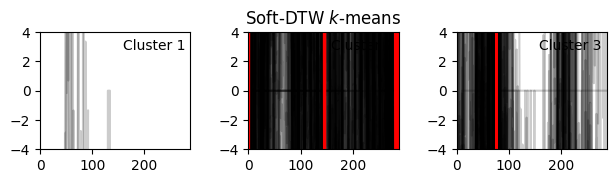

In [160]:
sz = l1_df.values[0].shape[1]

# Soft-DTW-k-means
print("Soft-DTW k-means")
sdtw_km = TimeSeriesKMeans(n_clusters=3,
                           metric="softdtw",
                           metric_params={"gamma": .01},
                           verbose=True)
y_pred = sdtw_km.fit_predict(l1_df.values[0])

for yi in range(3):
    plt.subplot(3, 3, 7 + yi)
    for xx in l1_df.values[0][y_pred == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    plt.plot(sdtw_km.cluster_centers_[yi].ravel(), "r-")
    plt.xlim(0, sz)
    plt.ylim(-4, 4)
    plt.text(0.55, 0.85,'Cluster %d' % (yi + 1),
             transform=plt.gca().transAxes)
    if yi == 1:
        plt.title("Soft-DTW $k$-means")

plt.tight_layout()
plt.show()

In [163]:
y_pred

array([0, 0, 0, 2, 2, 2, 2, 0, 2, 0, 0, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       0, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0,
       0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 0,
       0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 1,
       1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1,